# **1  Sentiment Analysis Tweet**

This project demonstrates classification of tweet sentiments using features derived from text data. Each tweet is labeled as either positive (4) or negative (0).We will go through data preprocessing,model building and evaluation.


In [127]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **1.1 Dataset Overview**

Let's load the dataset and check its basic structure

In [128]:
#loading the data and storing in a variable
df=pd.read_csv('../data/training.1600000.processed.noemoticon.csv',encoding='latin-1')


In [129]:
#getting the first 5 rows of the datset
df.head()


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [130]:
# Quick summary of columns, data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [131]:
#shape(rows and columns) of the dataset
df.shape

(1599999, 6)

In [132]:
# Shows summary statistics (count, mean, std, min, quartiles, max) for numeric columns
df.describe()

,0,1467810369
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [133]:
#returns the columns in the datset
df.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

### **1.2 Data Cleaning**
• Check for duplicates

• Check for missing values

• Ensure proper datatypes 

•Renaming Columns


In [134]:
#prints the duplicates in the dataset
df[df.duplicated()]

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"


In [135]:
#checking for sum of missing values in each column
df.isnull().sum()

0                                                                                                                      0
1467810369                                                                                                             0
Mon Apr 06 22:19:45 PDT 2009                                                                                           0
NO_QUERY                                                                                                               0
_TheSpecialOne_                                                                                                        0
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    0
dtype: int64

In [136]:
#Renaming Columns
df.rename(columns = {'0':'Sentiment Label', '1467810369':'Tweet ID', 'Mon Apr 06 22:19:45 PDT 2009':'Date', 'NO_QUERY':'Query', '_TheSpecialOne_':'User', "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":'Tweet'}, inplace = True)
df.head()

,Sentiment Label,Tweet ID,Date,Query,User,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [137]:
df['Sentiment Label'].value_counts()

Sentiment Label
4    800000
0    799999
Name: count, dtype: int64

### **1.3 Exploratory Data Analysis(EDA)**

Let's explore the datset with some visualizations

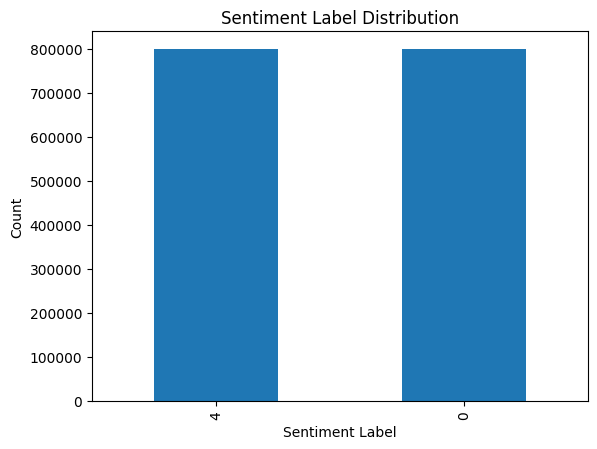

In [138]:
# Checking the distribution of sentiment labels
df['Sentiment Label'].value_counts().plot(kind='bar')
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()


<Axes: title={'center': 'TweetLength'}, xlabel='Sentiment Label'>

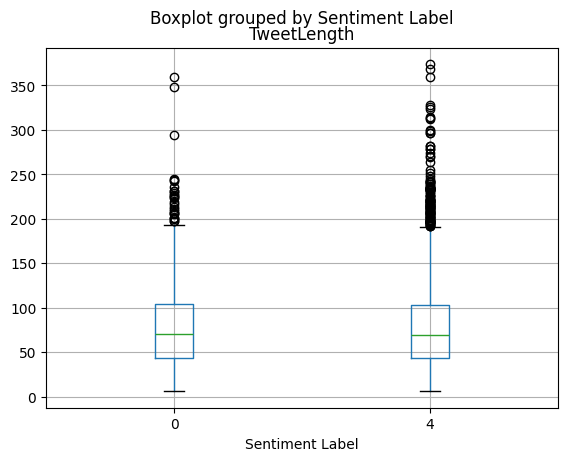

In [139]:
# Box plot to visualize the distribution of tweet lengths by sentiment label
df['TweetLength'] = df['Tweet'].apply(len)
df.boxplot(column='TweetLength', by='Sentiment Label')


### **1.4 Feature Engineering**

Dropping columns we do not need

In [140]:
# Dropping columns
df.drop(columns={'Tweet ID', 'Date', 'Query', 'User'},inplace=True)

In [141]:
#checking the first 5 rows of the updated dataset
df.head()

,Sentiment Label,Tweet,TweetLength
0,0,is upset that he can't update his Facebook by ...,111
1,0,@Kenichan I dived many times for the ball. Man...,89
2,0,my whole body feels itchy and like its on fire,47
3,0,"@nationwideclass no, it's not behaving at all....",111
4,0,@Kwesidei not the whole crew,29


In [142]:
# Data Cleaning Function
import re

def cleaning_tweet(text):
    text = text.lower()  
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'\d+', '', text)  
    text = re.sub(r'\s+', ' ', text).strip()
    return text

print(cleaning_tweet("Hey! Check out my blog at https://example.com #blogging @user"))


hey check out my blog at blogging


In [143]:
df['cleaned_tweet'] = df['Tweet'].apply(cleaning_tweet)
df.head()

,Sentiment Label,Tweet,TweetLength,cleaned_tweet
0,0,is upset that he can't update his Facebook by ...,111,is upset that he cant update his facebook by t...
1,0,@Kenichan I dived many times for the ball. Man...,89,i dived many times for the ball managed to sav...
2,0,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all....",111,no its not behaving at all im mad why am i her...
4,0,@Kwesidei not the whole crew,29,not the whole crew


### **1.5 Train-Test Split**

Divide the data into training and testing sets

In [144]:
#splitting the features and target
from sklearn.model_selection import train_test_split
X = df['cleaned_tweet']
y = df['Sentiment Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
# Text Vectorization using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000) 

X_train_tfidf = vectorizer.fit_transform(X_train)

X_test_tfidf = vectorizer.transform(X_test)


In [146]:
#printing the first 100 words in the vocabulary
print(vectorizer.get_feature_names_out()[:100])  # first 50 words


['aa' 'aaah' 'aah' 'aaron' 'abandoned' 'abc' 'ability' 'abit' 'able'
 'about' 'above' 'absolute' 'absolutely' 'abt' 'ac' 'accent' 'accept'
 'accepted' 'access' 'accident' 'accidentally' 'accomplished' 'according'
 'account' 'accounts' 'ace' 'ache' 'aches' 'aching' 'ack' 'acoustic'
 'across' 'act' 'acting' 'action' 'active' 'actor' 'actress' 'actual'
 'actually' 'ad' 'adam' 'add' 'added' 'addicted' 'addicting' 'addiction'
 'addictive' 'adding' 'address' 'admin' 'admit' 'adorable' 'adore' 'ads'
 'adult' 'advance' 'advantage' 'adventure' 'adventures' 'advice' 'afford'
 'afraid' 'africa' 'after' 'afternoon' 'afterwards' 'again' 'against'
 'age' 'ages' 'agh' 'ago' 'agree' 'agreed' 'ah' 'aha' 'ahah' 'ahaha'
 'ahahaha' 'ahead' 'ahh' 'ahhh' 'ahhhh' 'ahhhhh' 'ahhhhhh' 'ai' 'aim'
 'aint' 'air' 'airport' 'aj' 'aka' 'ako' 'al' 'alan' 'alarm' 'alas'
 'album' 'albums']


### **1.6 Model Training**

We will train both Logistic Regression and Linear SVC and compare the performance

In [147]:
# Training a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=1000, solver='liblinear')
log.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [148]:
# Predicting the Test Set using Logistic Regression
y_pred_log=log.predict(X_test_tfidf)

In [149]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [150]:
y_pred_svm = svm.predict(X_test_tfidf)

### **1.7 Model Evaluation**

In [151]:
# Evaluating the Logistic Regression Model
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nReport:\n", classification_report(y_test, y_pred_log))


Accuracy: 0.79105625

Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           4       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



[[123993  35501]
 [ 31361 129145]]


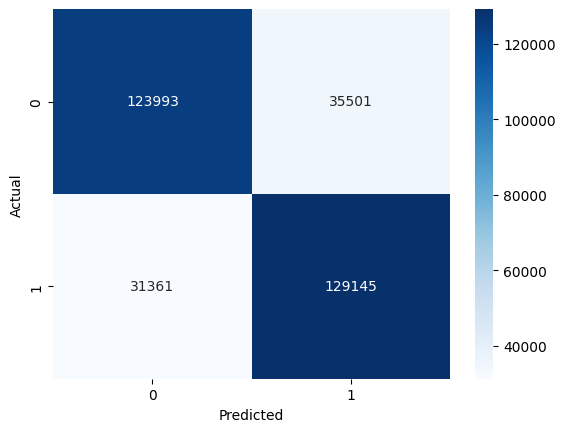

In [152]:
# Confusion Matrix for Logistic Regression

cm = confusion_matrix(y_test, y_pred_log)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy:0.790246875
              precision    recall  f1-score   support

           0       0.80      0.77      0.79    159494
           4       0.78      0.81      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



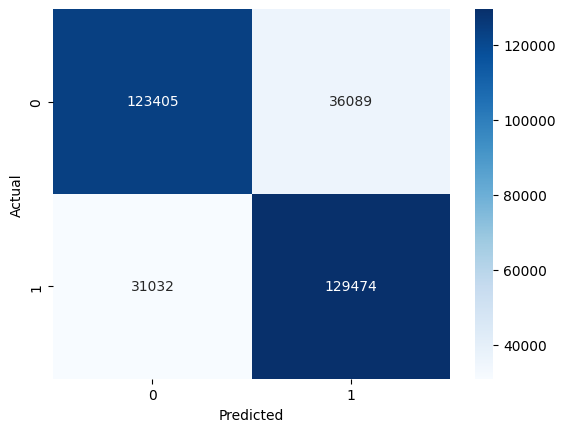

In [153]:
# Evaluating the SVM Model

print(f"Accuracy:{accuracy_score(y_test, y_pred_svm)}")
cm=confusion_matrix(y_test, y_pred_svm)

print(classification_report(y_test, y_pred_svm))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [154]:
# Compare the accuracy of different models in a DataFrame
models = ["Logistic Regression", "Linear SVC"]
accuracies = [
    accuracy_score(y_test, y_pred_log),         
    accuracy_score(y_test, y_pred_svm),     
    
]
results = pd.DataFrame({"Model": models, "Accuracy": accuracies})
print(results)

                 Model  Accuracy
0  Logistic Regression  0.791056
1           Linear SVC  0.790247


In [155]:
# Save model comparison results to a CSV file
results.to_csv("../scripts/predictions.csv")

### **1.8 Conclusion**
• We compared multiple learning models for predicting Tweets

•Both Logistic Regression and Linear SVC achieve similar performance (~79% accuracy) with balanced precision and recall across classes. Logistic Regression may be preferred for interpretability, while Linear SVC may be slightly better if recall on positive tweets (class 4) is a priority. Overall, either model is suitable for this sentiment classification task
